In [1]:
%load_ext autoreload
%autoreload 2
import dotenv
dotenv.load_dotenv()

True

# Load trainer

In [9]:
from experimentator import build_experiment, find

exp = build_experiment(find("../configs/pifball.py"), load_weights=False, eval_epochs=range(10,101,10))

../configs/pifball.py found in /import/home/gva/repositories/deepsport/notebooks/../configs/pifball.py
gva/camera_with_ball_visible_views.pickle found in /DATA/datasets/gva/camera_with_ball_visible_views.pickle


/home/gva/miniconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# Show dataset

[('training', 1414), ('testing', 234)]


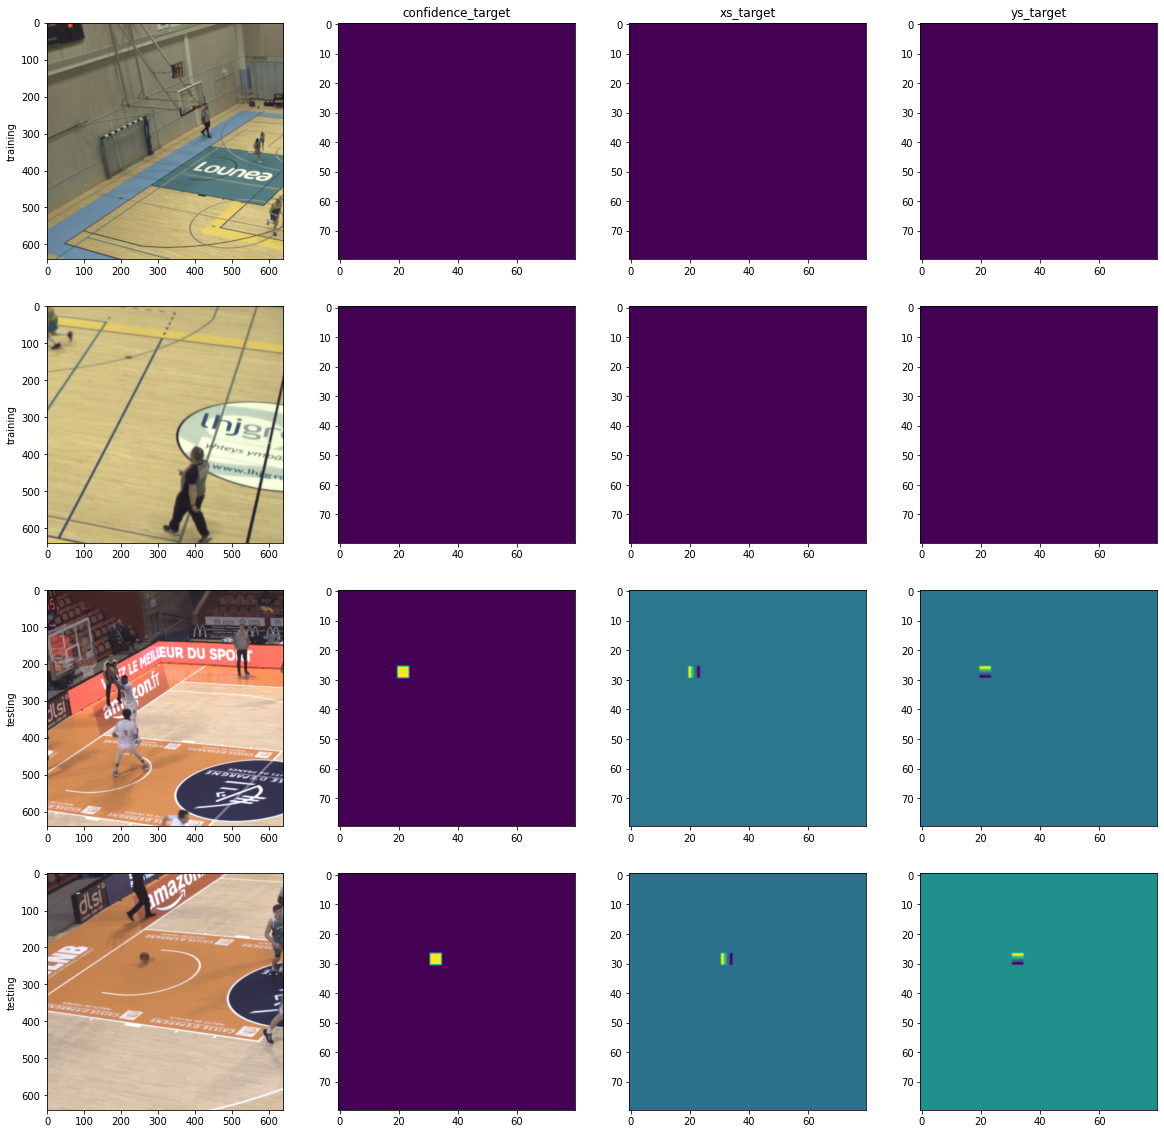

In [38]:
from matplotlib import pyplot as plt
from deepsport_utilities.utils import colorify_heatmap, np

print([(subset.name, len(subset)) for subset in exp.subsets])

N = 2
names = ['confidence_target', 'xs_target', 'ys_target']
fig, axes = plt.subplots(len(exp.subsets)*N, (1+len(names)), figsize=(20,20))
for i, subset in enumerate(exp.subsets):
    it = iter(subset.keys)
    for j in range(N):
        item = subset.dataset.query_item(next(it))
        axes[i*N+j,0].imshow(item["input_image"])
        for k, name in enumerate(names):
            axes[i*N+j,k+1].imshow(item[name])
            axes[0,k+1].set_title(name)
        axes[i*N+j,0].set_ylabel(subset.name)

# Train for 10 epochs

In [ ]:
exp.train(10) # Good performence obtained after 100 epochs

# Show inference result

# Print resulting metrics